# Competitor Analysis for Ride Sharing Company (Zuber)
This notebook is the conclusion of a larger analysis pulled from a Postgre SQL database of Taxi data in the Chicago area, and weather data scraped from [Slava Public](http://slava-public-access.s3-website-eu-west-1.amazonaws.com).  
Data gathered from those sources are imported here from csv files for further analysis and testing the hypothesis: "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

In [38]:
# Import Local Libraries
import os

# Import Third Party Libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [39]:
def load_data(file_name):
    """Attempts to load data from the current directory, then attempts to load data from the TripleTen server"""
    try:
        df = pd.read_csv(file_name)
    except:
        df = pd.read_csv(f'/datasets/{file_name}')
    return df

In [40]:
# Create the images directory, overwrite if it already exists
if not os.path.exists('images'):
    os.makedirs('images')
else:
    os.system('rm -rf images')
    os.makedirs('images')

In [41]:
# Load the first dataset.
dfq1 = load_data('project_sql_result_01.csv')

# Load the second dataset.
dfq4 = load_data('project_sql_result_04.csv')

In [42]:
dfq1.info()
display(dfq1.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [43]:
print(dfq1['trips_amount'].describe())

# Check for duplicate company names
print('\nduplicate company names:',dfq1['company_name'].duplicated().sum())

count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64

duplicate company names: 0


Looking good here.

In [44]:
dfq4.info()
display(dfq4.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   trips_count            94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,trips_count
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [45]:
print(dfq4['trips_count'].describe())

# Check for duplicate dropoff locations
print('\nduplicate dropoff locations:',dfq4['dropoff_location_name'].duplicated().sum())

count       94.000000
mean       599.953728
std       1714.591098
min          1.800000
25%         14.266667
50%         52.016667
75%        298.858333
max      10727.466667
Name: trips_count, dtype: float64

duplicate dropoff locations: 0


Looking good here too.

# Identify the top 10 neighborhoods in terms of dropoff locations


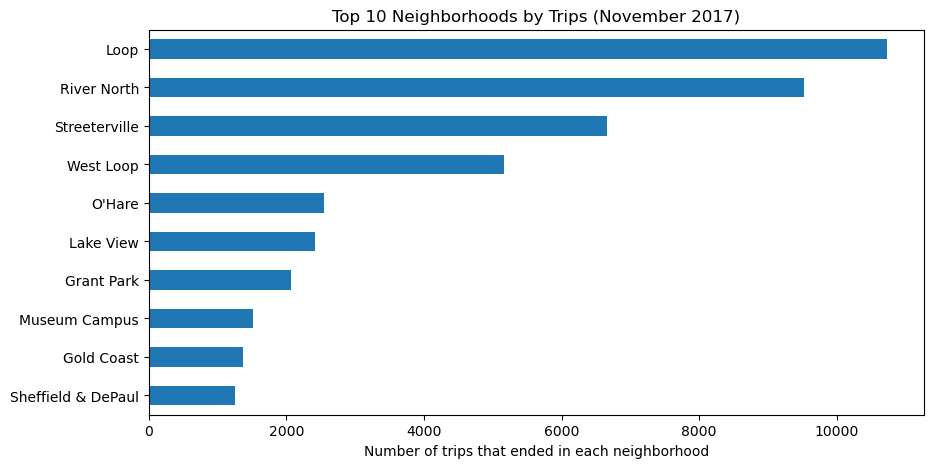

In [46]:
# Sort the data by trips_count in descending order, and select the top 10 neighborhoods.
top_neighborhoods = dfq4.sort_values(by='trips_count', ascending=False).head(10)

# Plot the data
plot = top_neighborhoods.plot(kind='barh', x='dropoff_location_name', y='trips_count', legend=False, figsize=(10,5))

# Set the title and labels
plot.set_title('Top 10 Neighborhoods by Trips (November 2017)')
plot.set_xlabel('Number of trips that ended in each neighborhood')
plot.set_ylabel('')

# Invert the y-axis so that the neighborhood with the highest average trips is at the top
plot.invert_yaxis()

# Save the plot
plt.savefig('images/top_10_neighborhoods.png')

plt.show()

The Loop neighborhood proves to be the most common destination for the month of November 2017. 


# Identify the Top 10 Taxi Companies
in terms of the number of rides for each taxi company on November 15-16, 2017.

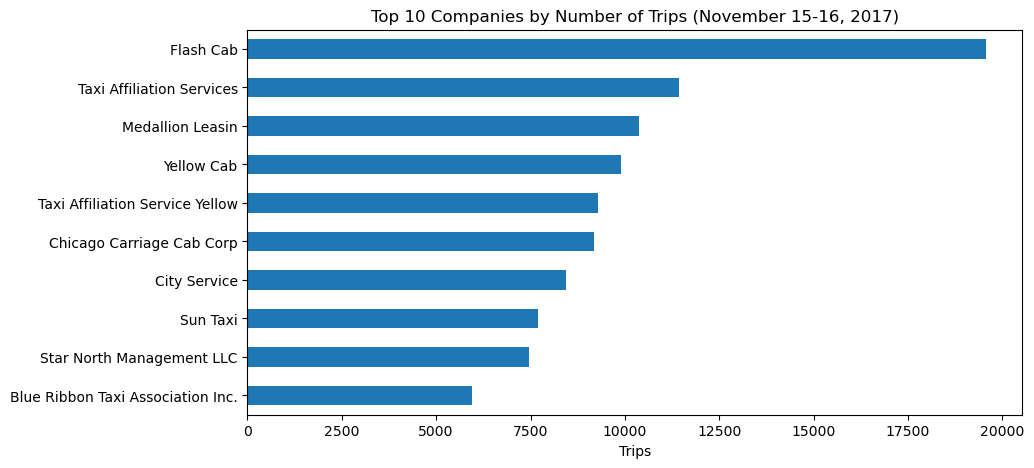

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [47]:
# Sort by trips amount in descending order and select the top 10 companies
top_companies = dfq1.sort_values(by='trips_amount', ascending=False).head(10)

# Plot the data
plot = top_companies.plot(kind='barh', x='company_name', y='trips_amount', legend=False, figsize=(10,5))

# Set the title and labels
plot.set_title('Top 10 Companies by Number of Trips (November 15-16, 2017)')
plot.set_xlabel('Trips')
plot.set_ylabel('')

# Invert the y-axis so that the company with the highest number of trips is at the top
plot.invert_yaxis()

# Save the plot
plt.savefig('images/top_10_companies.png')

plt.show()
display(top_companies)

The Flash Cab company proves to be the most used cab services between November 15th and 16th, 2017 - leading second place by almost double.

# Test The Hypothesis:

"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

In [48]:
# Load the third dataset. Details of data:
# Retrieve from the trips table all the rides that started in the Loop
# (neighborhood_id : 50) and ended at O'Hare (neighborhood_id : 63) on a Saturday,
# the weather conditions for each ride.

dfq7 = load_data('project_sql_result_07.csv')

dfq7.info()
display(dfq7.head())
print(dfq7['duration_seconds'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


count    1068.000000
mean     2071.731273
std       769.461125
min         0.000000
25%      1438.250000
50%      1980.000000
75%      2580.000000
max      7440.000000
Name: duration_seconds, dtype: float64


In [49]:
# Looks like there are some durations of 0 seconds. These may be 'missing values.' Let's check how many there are and how much of the data they represent
def check_zero_durations(df):
    zero_durations = df[df['duration_seconds'] == 0]
    print(f'\nNumber of zero durations: {zero_durations.shape[0]}')
    print(f'Percentage of data: {zero_durations.shape[0] / df.shape[0] * 100:.2f}%')

check_zero_durations(dfq7)


Number of zero durations: 6
Percentage of data: 0.56%


In [50]:
# That's small enough to drop the rows with 0 duration. Since the duration is in seconds, we can assume that the rides with 0 duration are missing values.
dfq7 = dfq7[dfq7['duration_seconds'] != 0]

print(dfq7['duration_seconds'].describe())

count    1062.000000
mean     2083.435970
std       755.651796
min        60.000000
25%      1440.000000
50%      1980.000000
75%      2580.000000
max      7440.000000
Name: duration_seconds, dtype: float64


In [51]:
# Change start_ts to datetime
dfq7['start_ts'] = pd.to_datetime(dfq7['start_ts'])

In [52]:
# Since the hypothesis is asking about the effect of rainy (Satur)days, not hours, we will classify each Saturday as either 'Rainy' or 'Clear'
# If any hour on a Saturday is classified as 'Bad', then the entire day will be classified as 'Rainy' 

rainVclear = dfq7.groupby(dfq7['start_ts'].dt.date).aggregate({'weather_conditions':lambda x: 'Rainy' if 'Bad' in x.values else 'Clear'}).reset_index().rename(columns={'start_ts':'date','weather_conditions':'weather'})

display(rainVclear)


,date,weather
0,2017-11-04,Rainy
1,2017-11-11,Clear
2,2017-11-18,Rainy
3,2017-11-25,Clear


In [53]:
# Left join dfq7 with rainVclear on date to see the weather condition defined for the entire day
hypothesis_data = dfq7.merge(rainVclear, left_on=dfq7['start_ts'].dt.date, right_on='date', how='left')[['start_ts','duration_seconds','weather']]

display(hypothesis_data)

,start_ts,duration_seconds,weather
0,2017-11-25 16:00:00,2410.0,Clear
1,2017-11-25 14:00:00,1920.0,Clear
2,2017-11-25 12:00:00,1543.0,Clear
3,2017-11-04 10:00:00,2512.0,Rainy
4,2017-11-11 07:00:00,1440.0,Clear
...,...,...,...
1057,2017-11-11 06:00:00,1500.0,Clear
1058,2017-11-11 10:00:00,1318.0,Clear
1059,2017-11-11 13:00:00,2100.0,Clear
1060,2017-11-11 08:00:00,1380.0,Clear


In [54]:
# Define the null hypothesis
null_hypothesis = "There is no difference in the average duration of rides from the Loop to O'Hare on rainy Saturdays compared to clear Saturdays."
print(f'Null Hypothesis: {null_hypothesis}')

# Define the groups
rainy = hypothesis_data.query('weather == "Rainy"')
clear = hypothesis_data.query('weather == "Clear"')

# Print the means for each group
rainy_mean = rainy['duration_seconds'].mean()
clear_mean = clear['duration_seconds'].mean()
print('\nRainy Mean:',rainy_mean)
print('Clear Mean:',clear_mean)

# Use the Lavene test to check if the variances are equal, with an alpha of 0.05
if st.levene(rainy['duration_seconds'], clear['duration_seconds']).pvalue < 0.05:
    equal_var = False
else:
    equal_var = True
    
print('\nPerforming t-test with equal_var =',equal_var)

# Perform the t-test using ind since the samples are independent
pvalue = st.ttest_ind(rainy['duration_seconds'], clear['duration_seconds'], equal_var=equal_var).pvalue

# measure the results against a list of alpha values
alpha_values = [0.01, 0.025, 0.05, 0.075, 0.1]

for alpha in alpha_values:
    if pvalue < alpha:
        print(f'\nReject the null hypothesis at alpha = {alpha}')
    else:
        print(f'\nFail to reject the null hypothesis at alpha = {alpha}')
        



Null Hypothesis: There is no difference in the average duration of rides from the Loop to O'Hare on rainy Saturdays compared to clear Saturdays.

Rainy Mean: 2344.8125
Clear Mean: 1808.9401544401544

Performing t-test with equal_var = False

Reject the null hypothesis at alpha = 0.01

Reject the null hypothesis at alpha = 0.025

Reject the null hypothesis at alpha = 0.05

Reject the null hypothesis at alpha = 0.075

Reject the null hypothesis at alpha = 0.1


We reject the null hypothesis at the 0.01 level of significance, indicating strong evidence that there is a difference in the average duration of rides between rainy and clear days. Unsurprisingly, Saturdays with rainy weather tend to have longer trip durations. 

In [55]:
difference = clear_mean - rainy_mean
print(f'\nDifference in means: {difference:.2f} seconds, or {difference / 60:.2f} minutes')


Difference in means: -535.87 seconds, or -8.93 minutes


# Conclusions

1. The Loop neighborhood proves to be the most common destination for the month of November 2017. 
2. The Flash Cab company proves to be the most used cab services between November 15th and 16th, 2017 - leading second place by almost double.
3. We can reject the null hypothesis that there is no difference in average duration of rides from Loop to O'Hare on rainy Saturdays compared to clear Saturdays with an alpha value as low as .01, providing strong evidence that this perceived difference is not due to statistical noise. Trips on clear Saturdays average significantly shorter durations than trips on Rainy Saturdays. The difference between durations for the two groups is about 8.93 minutes.